# Further Feature Engineering

In previous ML model, we built prediction models using base models and resampling technique. Now I am going to derive some features that potentially could assist with linear relationship with target variable.

In [40]:
# importing libraries
# main libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('PrepChurnData.csv')
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,1,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,1,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,1,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,0,0,0,1


## Age Group

In [3]:
group = [18,20,30,40,50,60,70,93]
labels = ['<20', '20s', '30s','40s','50s','60s','>70']
data['Age_group']=pd.cut(data['Age'], bins=group, labels=labels, right=False)

## Balance/Salary Ratio

<AxesSubplot:ylabel='Density'>

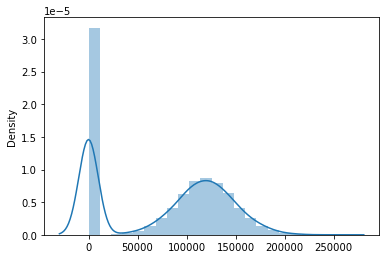

In [8]:
sns.distplot(x=data['Balance'])

### Handling zero values

In [15]:
data.loc[(data['Balance']==0) & (data['Exited']==1)]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group
0,15634602,Hargrave,619,42,2,0.0,1,1,1,101348.88,...,1,2,DIAMOND,464,1,0,1,0,0,40s
22,15699309,Gerasimov,510,38,4,0.0,1,1,0,118913.53,...,1,2,DIAMOND,887,1,0,0,0,1,30s
30,15589475,Azikiwe,591,39,3,0.0,3,1,0,140469.38,...,1,3,DIAMOND,298,1,0,0,0,1,30s
58,15623944,T'ien,511,66,4,0.0,1,1,0,1643.11,...,1,5,SILVER,549,1,0,0,0,1,60s
81,15663706,Leonard,777,32,2,0.0,1,1,0,136458.19,...,1,5,SILVER,917,1,0,1,0,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,15687626,Zhirov,527,39,4,0.0,2,1,0,167183.07,...,1,2,SILVER,567,0,1,1,0,0,30s
9884,15686974,Sergeyeva,751,48,4,0.0,1,0,1,30165.06,...,1,3,DIAMOND,591,1,0,1,0,0,40s
9898,15746569,Tsui,589,38,4,0.0,1,1,0,95483.48,...,1,5,DIAMOND,443,0,1,1,0,0,30s
9962,15594612,Flynn,702,44,9,0.0,1,0,0,59207.41,...,1,4,DIAMOND,977,0,1,0,0,1,40s


In [16]:
data.loc[data['Exited']==1]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,...,1,2,DIAMOND,464,1,0,1,0,0,40s
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,3,DIAMOND,377,1,0,1,0,0,40s
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,1,5,DIAMOND,484,0,1,0,0,1,40s
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,1,2,DIAMOND,282,1,0,0,1,0,20s
16,15737452,Romeo,653,58,1,132602.88,1,1,0,5097.67,...,0,2,SILVER,163,0,1,0,1,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,42,3,152039.70,1,1,1,53445.17,...,1,3,GOLD,790,0,1,0,1,0,40s
9982,15768163,Griffin,655,46,7,137145.12,1,1,0,115146.40,...,1,4,GOLD,591,1,0,0,1,0,40s
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,1,3,GOLD,369,1,0,1,0,0,50s
9997,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,...,1,3,SILVER,564,1,0,1,0,0,30s


In [27]:
zero_ratio_exit = data.loc[(data['Balance']==0) & (data['Exited']==1)].shape[0]/data.loc[data['Exited']==1].shape[0]
print('Customer with zero balance has {:.2f}% churn rate'.format(zero_ratio_exit*100))

Customer with zero balance has 24.53% churn rate


Let's make separate case for zero-balanced customer for analysis.

In [28]:
zero_df = data.loc[data['Balance']==0]
non_zero_df = data.loc[data['Balance']!=0]
print(zero_df.shape)
print(non_zero_df.shape)

(3617, 21)
(6383, 21)


# Analysis of Non-Zero Balance set

<AxesSubplot:ylabel='Density'>

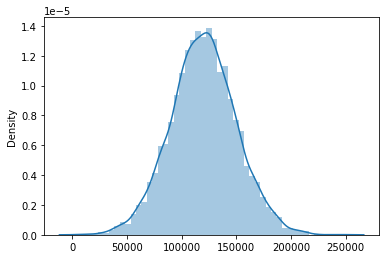

In [89]:
sns.distplot(x=non_zero_df['Balance'])

Now the balance is normally distributed

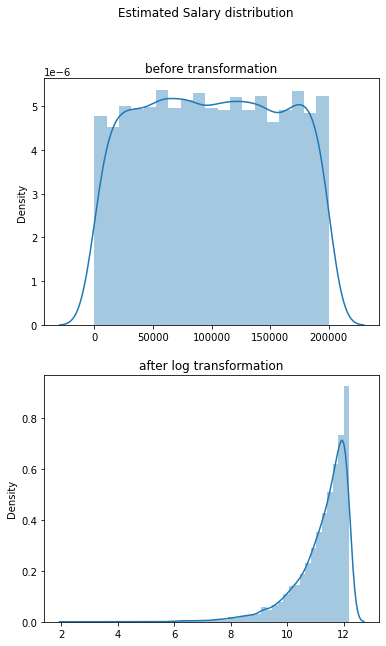

In [71]:
fig, axes = plt.subplots(2,1, figsize=(6,10))
# fig.tight_layout()
ax = sns.distplot(x=non_zero_df['EstimatedSalary'], ax=axes[0])
ax.set(title='before transformation')
ax = sns.distplot(x=np.log(non_zero_df['EstimatedSalary']), ax=axes[1])
ax.set(title='after log transformation')
plt.suptitle('Estimated Salary distribution')
plt.show()

After log transformation the distribution is left-skewed. We are going to keep the log transformation.

In [83]:
non_zero_df['log_EstimatedSalary']=np.log(non_zero_df['EstimatedSalary'])
non_zero_df['log_Balance']=np.log(non_zero_df['Balance'])

Scaling Balance

In [84]:
scaler = StandardScaler()
cols = ['log_Balance', 'log_EstimatedSalary']
non_zero_df[cols] = scaler.fit_transform(non_zero_df[cols])

In [85]:
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Point Earned,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,Balance_scaled,log_Balance
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,456,1,0,0,0,1,40s,0.415828,-1.196956,-1.142312
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,377,1,0,1,0,0,40s,0.428393,1.323687,1.145961
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,425,1,0,0,0,1,40s,0.054419,0.188861,0.291541
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,484,0,1,0,0,1,40s,0.708464,-0.201767,-0.057591
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,282,1,0,0,1,0,20s,0.475960,-0.158868,-0.017527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,369,1,0,1,0,0,50s,-0.079612,-1.044981,-0.953674
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,715,0,1,1,0,0,20s,-0.966899,1.170813,1.042161
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,771,0,1,1,0,0,30s,0.312055,-2.075516,-2.487929
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,339,0,1,0,1,0,40s,0.219224,-1.487144,-1.532973


In [107]:
non_zero_df.loc[non_zero_df['log_Balance']>non_zero_df['log_EstimatedSalary']]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Point Earned,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,Balance_scaled,log_Balance
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,377,1,0,1,0,0,40s,0.428393,1.323687,1.145961
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,425,1,0,0,0,1,40s,0.054419,0.188861,0.291541
8,15792365,He,501,44,4,142051.07,2,0,1,74940.50,...,251,0,1,1,0,0,40s,-0.000709,0.738504,0.731053
9,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,...,342,0,1,1,0,0,20s,-0.045621,0.491029,0.539866
15,15643966,Goforth,616,45,3,143129.41,2,0,1,64327.26,...,308,0,1,0,1,0,40s,-0.157138,0.774338,0.757902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Griffin,655,46,7,137145.12,1,1,0,115146.40,...,591,1,0,0,1,0,40s,0.439258,0.575476,0.606269
9986,15581736,Bartlett,673,47,1,183579.54,2,0,1,34047.54,...,772,0,1,0,1,0,40s,-0.808852,2.118522,1.641574
9987,15588839,Mancini,606,30,8,180307.73,2,1,1,1914.41,...,567,0,1,0,0,1,30s,-3.757275,2.009798,1.577729
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,715,0,1,1,0,0,20s,-0.966899,1.170813,1.042161


### Creating Balance>Salary and Balance to Salary ratio columns

In [119]:
non_zero_df['Balance>Salary'] = np.where(non_zero_df['Balance'] > non_zero_df['EstimatedSalary'], 1, 0)
condition = np.where(non_zero_df['Balance']>non_zero_df['EstimatedSalary'], 1, non_zero_df['Balance']/non_zero_df['EstimatedSalary'])
non_zero_df['Balance_Salary'] = condition

In [120]:
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,Balance_Salary
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,1,0,0,0,1,40s,0.415828,-1.142312,0,0.744677
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,0,1,0,0,40s,0.428393,1.145961,1,1.000000
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,1,0,0,0,1,40s,0.054419,0.291541,1,1.000000
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,0,1,0,0,1,40s,0.708464,-0.057591,0,0.759604
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,1,0,0,1,0,20s,0.475960,-0.017527,0,0.963969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,1,0,1,0,0,50s,-0.079612,-0.953674,1,1.000000
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,0,1,1,0,0,20s,-0.966899,1.042161,1,1.000000
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,0,1,1,0,0,30s,0.312055,-2.487929,0,0.564108
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,0,1,0,1,0,40s,0.219224,-1.532973,0,0.808230


## Loyalty (Tenure to Age)

In [128]:
non_zero_df['Loyalty'] = non_zero_df['Tenure']/non_zero_df['Age']
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,Balance_Salary,Loyalty
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,1,40s,0.415828,-1.142312,0,0.744677,0.024390
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,0,1,0,0,40s,0.428393,1.145961,1,1.000000,0.190476
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,1,40s,0.054419,0.291541,1,1.000000,0.046512
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,1,0,0,1,40s,0.708464,-0.057591,0,0.759604,0.181818
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,0,0,1,0,20s,0.475960,-0.017527,0,0.963969,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,0,1,0,0,50s,-0.079612,-0.953674,1,1.000000,0.075472
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,1,1,0,0,20s,-0.966899,1.042161,1,1.000000,0.250000
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,1,1,0,0,30s,0.312055,-2.487929,0,0.564108,0.285714
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,1,0,1,0,40s,0.219224,-1.532973,0,0.808230,0.071429


In [148]:
non_zero_df.loc[(non_zero_df['Loyalty']==0)&(non_zero_df['Exited']==1)]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,Balance_Salary,Loyalty
35,15794171,Lombardo,475,45,0,134264.04,1,1,0,27822.99,...,0,1,0,0,40s,-1.015663,0.530891,1,1.000000,0.0
127,15782688,Piccio,625,56,0,148507.24,1,1,0,46824.08,...,1,0,1,0,50s,-0.482455,0.888854,1,1.000000,0.0
164,15658929,Taverner,683,29,0,133702.89,1,1,0,55582.54,...,1,0,0,1,20s,-0.306809,0.516022,1,1.000000,0.0
543,15705953,Kodilinyechukwu,721,51,0,169312.13,1,1,0,109078.35,...,1,0,0,1,50s,0.383802,1.354338,1,1.000000,0.0
987,15613749,Lees,569,34,0,151839.26,1,1,0,102299.81,...,1,0,0,1,30s,0.318081,0.967632,1,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,15611767,Mai,624,52,0,133723.43,1,0,0,4859.59,...,0,0,1,0,50s,-2.803052,0.516567,1,1.000000,0.0
9316,15766355,Lettiere,550,49,0,108806.96,3,1,0,61446.92,...,1,0,1,0,40s,-0.204063,-0.215505,1,1.000000,0.0
9624,15668309,Maslow,350,40,0,111098.85,1,1,1,172321.21,...,0,1,0,0,40s,0.852229,-0.141498,0,0.644720,0.0
9625,15732437,Rowley,504,44,0,131873.07,2,1,1,158036.72,...,0,0,1,0,40s,0.763589,0.467097,0,0.834446,0.0


<AxesSubplot:xlabel='Loyalty', ylabel='Count'>

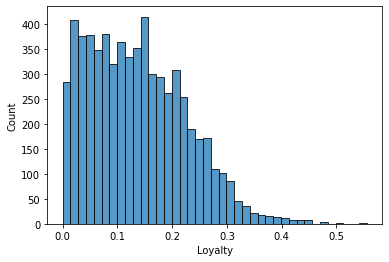

In [143]:
sns.histplot(x=non_zero_df['Loyalty'])